### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Loading the data

In [3]:
shooting_data = pd.read_excel('Shooting_Curr.xlsx')

In [4]:
shooting_data

S.no           Player         Nation            Squad Pos  Gls   Sh  SoT  \
0     218   Erling Haaland         Norway  Manchester City  FW   36  116   53   
1     453    Mohamed Salah          Egypt        Liverpool  FW   19  121   45   
2     266       Harry Kane        England        Tottenham  FW   30  124   54   
3     516       Ivan Toney        England        Brentford  FW   20   87   33   
4     552    Callum Wilson        England    Newcastle Utd  FW   18   70   31   
..    ...              ...            ...              ...  ..  ...  ...  ...   
564   227  Wayne Hennessey          Wales  Nott'ham Forest  GK    0    0    0   
565    64       Willy Boly  Côte d'Ivoire  Nott'ham Forest  DF    0    2    1   
566   526       Yan Valery        Tunisia      Southampton  DF    0    0    0   
567    37      Yasin Ayari         Sweden         Brighton  MF    0    1    0   
568   568       Kurt Zouma         France         West Ham  DF    2   19    5   

     SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  PKatt    xG  npxG  
0    45.7   3.77    1.72  0.25   0.55  12.6   0   7    7.0  28.4  23.0  
1    37.2   3.31    1.23  0.14   0.38  15.1   2   2    4.0  21.7  18.5  
2    43.5   3.28    1.43  0.20   0.46  16.0   3   5    6.0  21.5  16.7  
3    37.9   2.65    1.01  0.16   0.42  16.5   9   6    7.0  18.7  13.2  
4    44.3   3.36    1.49  0.21   0.48  12.4   0   3    3.0  17.5  15.1  
..    ...    ...     ...   ...    ...   ...  ..  ..    ...   ...   ...  
564   NaN   0.00    0.00   NaN    NaN   NaN   0   0    0.0   0.0   0.0  
565  50.0   0.26    0.13  0.00   0.00  16.7   0   0    0.0   0.0   0.0  
566   NaN   0.00    0.00   NaN    NaN   NaN   0   0    0.0   0.0   0.0  
567   0.0   1.34    0.00  0.00    NaN  29.7   0   0    0.0   0.0   0.0  
568  26.3   0.86    0.23  0.11   0.40  10.1   0   0    NaN   NaN   NaN  

[569 rows x 19 columns]

In [5]:
shooting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.no    569 non-null    int64  
 1   Player  569 non-null    object 
 2   Nation  569 non-null    object 
 3   Squad   569 non-null    object 
 4   Pos     569 non-null    object 
 5   Gls     569 non-null    int64  
 6   Sh      569 non-null    int64  
 7   SoT     569 non-null    int64  
 8   SoT%    467 non-null    float64
 9   Sh/90   569 non-null    float64
 10  SoT/90  569 non-null    float64
 11  G/Sh    467 non-null    float64
 12  G/SoT   396 non-null    float64
 13  Dist    467 non-null    float64
 14  FK      569 non-null    int64  
 15  PK      569 non-null    int64  
 16  PKatt   568 non-null    float64
 17  xG      568 non-null    float64
 18  npxG    568 non-null    float64
dtypes: float64(9), int64(6), object(4)
memory usage: 84.6+ KB


In [6]:
shooting_data.isnull().sum()

S.no        0
Player      0
Nation      0
Squad       0
Pos         0
Gls         0
Sh          0
SoT         0
SoT%      102
Sh/90       0
SoT/90      0
G/Sh      102
G/SoT     173
Dist      102
FK          0
PK          0
PKatt       1
xG          1
npxG        1
dtype: int64

In [7]:
shooting_data = shooting_data.drop_duplicates()
shooting_data = shooting_data.dropna()

In [8]:
shooting_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 0 to 565
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.no    395 non-null    int64  
 1   Player  395 non-null    object 
 2   Nation  395 non-null    object 
 3   Squad   395 non-null    object 
 4   Pos     395 non-null    object 
 5   Gls     395 non-null    int64  
 6   Sh      395 non-null    int64  
 7   SoT     395 non-null    int64  
 8   SoT%    395 non-null    float64
 9   Sh/90   395 non-null    float64
 10  SoT/90  395 non-null    float64
 11  G/Sh    395 non-null    float64
 12  G/SoT   395 non-null    float64
 13  Dist    395 non-null    float64
 14  FK      395 non-null    int64  
 15  PK      395 non-null    int64  
 16  PKatt   395 non-null    float64
 17  xG      395 non-null    float64
 18  npxG    395 non-null    float64
dtypes: float64(9), int64(6), object(4)
memory usage: 61.7+ KB


In [9]:
shooting_data.shape

(395, 19)

### Filtering and Splitting the data

In [10]:
# Filter the data for Chelsea FC
chelsea_data = shooting_data[shooting_data['Squad'] == 'Chelsea']

In [11]:
chelsea_data

S.no                     Player                    Nation    Squad  \
11    222                Kai Havertz                   Germany  Chelsea   
50    498            Raheem Sterling                   England  Chelsea   
68    171                 João Félix                  Portugal  Chelsea   
125   189            Conor Gallagher                   England  Chelsea   
156   361                Mason Mount                   England  Chelsea   
164   365            Mykhailo Mudryk                   Ukraine  Chelsea   
172   282              Mateo Kovačić                   Croatia  Chelsea   
177   420          Christian Pulisic  United States of America  Chelsea   
180   258                   Jorginho                     Italy  Chelsea   
198    33  Pierre-Emerick Aubameyang                     Gabon  Chelsea   
200   477               Thiago Silva                    Brazil  Chelsea   
204    94               Ben Chilwell                   England  Chelsea   
227    42          Benoît Badiashile                    France  Chelsea   
260   246                Reece James                   England  Chelsea   
266   280          Kalidou Koulibaly                   Senegal  Chelsea   
268   219                 Lewis Hall                   England  Chelsea   
271   315               Noni Madueke                   England  Chelsea   
273    91            Trevoh Chalobah                   England  Chelsea   
275    68              Armando Broja                   albania  Chelsea   
280   174             Enzo Fernández                 Argentina  Chelsea   
288   307         Ruben Loftus-Cheek                   England  Chelsea   
310   179              Wesley Fofana                    France  Chelsea   
313   567               Hakim Ziyech                   Morocco  Chelsea   
337    96         Carney Chukwuemeka                   England  Chelsea   
338    41          César Azpilicueta                     Spain  Chelsea   
381   267               N'Golo Kanté                    France  Chelsea   
393   122         David Datro Fofana             Côte d'Ivoire  Chelsea   

       Pos  Gls  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  \
11   FW,MF    7  70   31  44.3   2.45    1.09  0.09   0.19  12.7   1   1   
50   FW,MF    6  42   16  38.1   2.00    0.76  0.14   0.38  13.6   0   0   
68   FW,MF    4  46   16  34.8   4.40    1.53  0.09   0.25  18.0   3   0   
125     MF    3  28   11  39.3   1.55    0.61  0.11   0.27  17.9   0   0   
156  MF,FW    3  33    9  27.3   1.80    0.49  0.09   0.33  19.7   2   0   
164  FW,MF    0  14    5  35.7   1.92    0.68  0.00   0.00  18.4   0   0   
172     MF    1  23    1   4.3   1.21    0.05  0.04   1.00  22.1   0   0   
177  FW,DF    1  19    6  31.6   2.08    0.66  0.05   0.17  16.8   0   0   
180     MF    2   3    1  33.3   0.21    0.07  0.00   0.00  34.1   0   2   
198     FW    1  16    7  43.8   2.60    1.14  0.06   0.14  13.7   0   0   
200     DF    0  15    2  13.3   0.57    0.08  0.00   0.00  13.0   0   0   
204  DF,MF    2  16    4  25.0   1.02    0.26  0.13   0.50  16.1   0   0   
227     DF    1   6    2  33.3   0.60    0.20  0.17   0.50   7.2   0   0   
260  DF,MF    1  16    4  25.0   1.16    0.29  0.06   0.25  22.4   2   0   
266     DF    2  11    4  36.4   0.55    0.20  0.18   0.50  12.0   0   0   
268     DF    0  11    5  45.5   1.51    0.69  0.00   0.00  15.0   0   0   
271     FW    1  12    6  50.0   1.68    0.84  0.08   0.17  15.6   0   0   
273     DF    0   9    2  22.2   0.50    0.11  0.00   0.00   9.6   0   0   
275     FW    1   6    5  83.3   1.84    1.53  0.17   0.20  11.0   0   0   
280     MF    0  20    3  15.0   1.16    0.17  0.00   0.00  25.7   2   0   
288  MF,DF    0   9    2  22.2   0.53    0.12  0.00   0.00  18.6   0   0   
310     DF    1   6    2  33.3   0.46    0.15  0.17   0.50  11.4   0   0   
313  FW,MF    0  16    3  18.8   2.18    0.41  0.00   0.00  22.7   0   0   
337  MF,FW    0   5    1  20.0   1.27    0.25  0.00   0.00  17.2   0   0   
338 

In [12]:
shooting_data.groupby('Squad').size()

Squad
Arsenal            18
Aston Villa        17
Bournemouth        18
Brentford          19
Brighton           19
Chelsea            27
Crystal Palace     15
Everton            21
Fulham             18
Leeds United       22
Leicester City     21
Liverpool          22
Manchester City    18
Manchester Utd     20
Newcastle Utd      17
Nott'ham Forest    22
Southampton        22
Tottenham          20
West Ham           18
Wolves             21
dtype: int64

In [13]:
# Read the league table file
league_table = pd.read_excel('League table_Curr.xlsx')



In [14]:
# Sort the table by points in descending order to get the top teams
top_teams = league_table.sort_values(by='Pts', ascending=False).head(3)

In [15]:
top_teams

Rk             Squad  MP   W  D  L  GF  GA  GD  Pts
0   1   Manchester City  38  28  5  5  94  33  61   89
1   2           Arsenal  38  26  6  6  88  43  45   84
2   3    Manchester Utd  38  23  6  9  58  43  15   75

In [16]:
# Extract team names and store them in a list
top_team_names = [team.strip() for team in top_teams['Squad']]

In [17]:

# Display the top 3 team names
print("Top 3 Team Names:")
print(top_team_names)

Top 3 Team Names:
['Manchester City', 'Arsenal', 'Manchester Utd']


In [18]:
top_team1_data = shooting_data[shooting_data['Squad'] == top_team_names[0]]
top_team2_data = shooting_data[shooting_data['Squad'] == top_team_names[1]]
top_team3_data = shooting_data[shooting_data['Squad'] == top_team_names[2]]

### Analysis and Visualizations

In [19]:
# Function to plot shooting performance metrics
def plot_shooting_performance(data, team_name):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Player'], data['Sh/90'], color='blue', alpha=0.7, label='Sh/90')
    plt.bar(data['Player'], data['G/SoT'], color='red', alpha=0.7, label='G/SoT')
    plt.xlabel('Player')
    plt.ylabel('Metrics')
    plt.title(f'Shooting Performance Metrics for {team_name}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

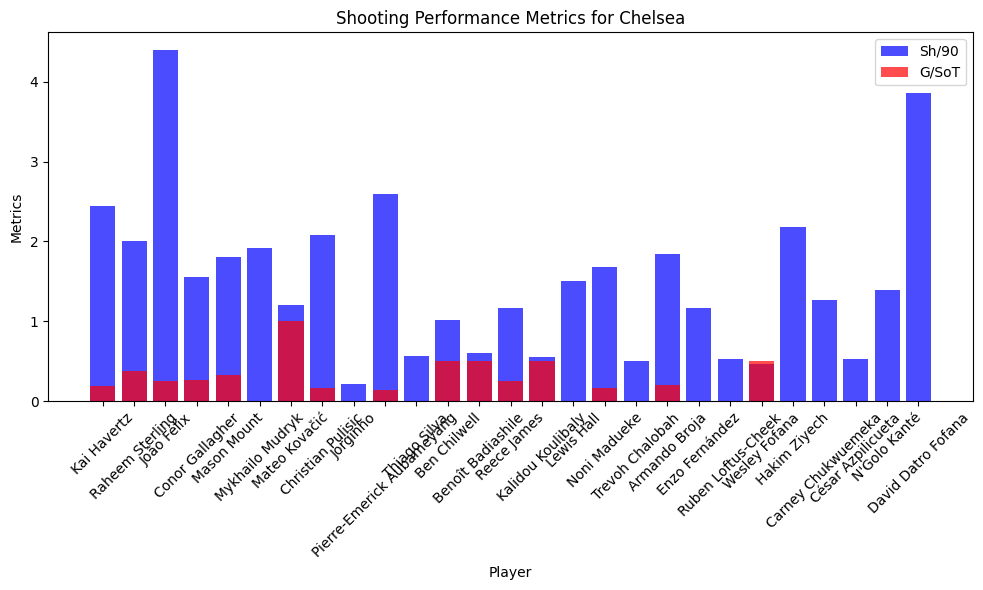

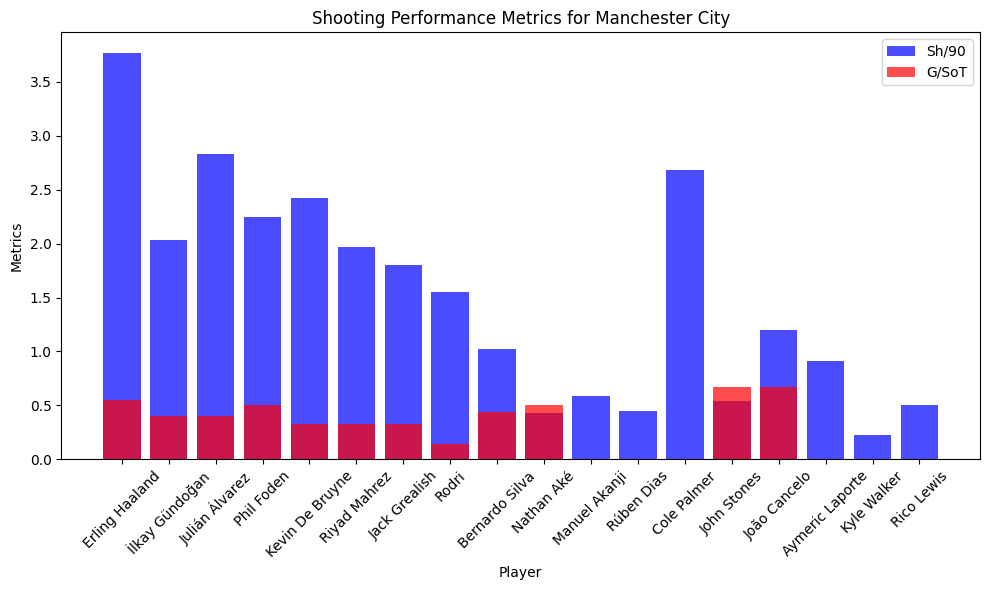

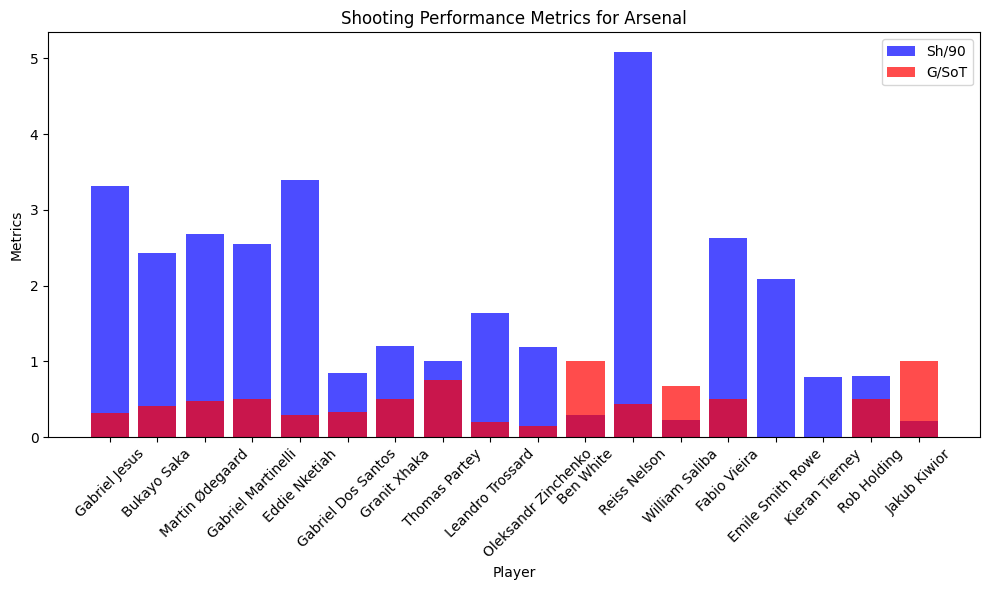

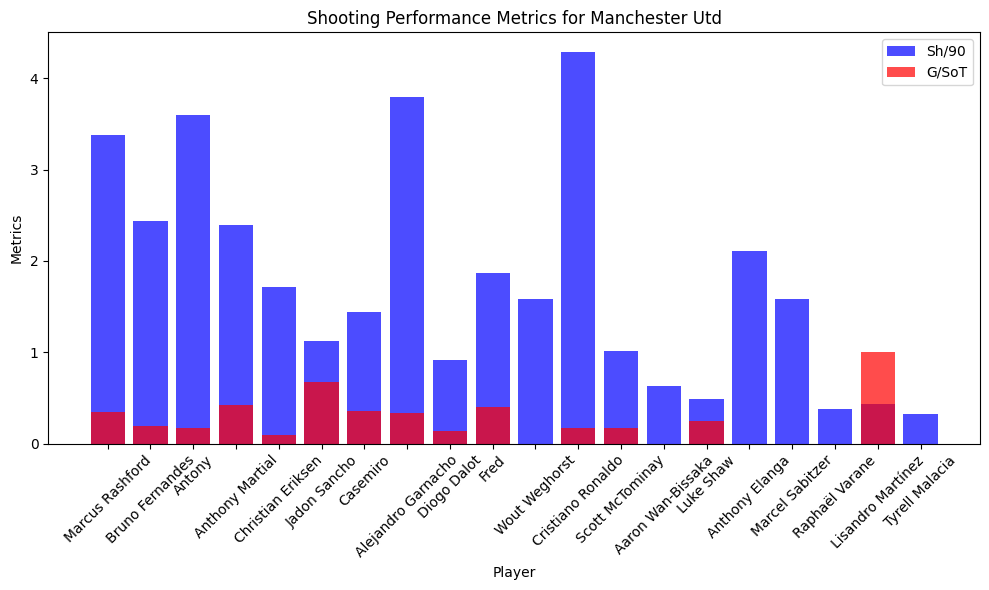

In [20]:
# Plot shooting performance for Chelsea FC
plot_shooting_performance(chelsea_data, 'Chelsea')

# Plot shooting performance for the top 3 teams
plot_shooting_performance(top_team1_data, top_team_names[0])
plot_shooting_performance(top_team2_data, top_team_names[1])
plot_shooting_performance(top_team3_data, top_team_names[2])

In [21]:
# Function to create a bar chart for goals and shots for each player
def plot_goals_and_shots(data, team_name):
    plt.figure(figsize=(12, 6))
    plt.bar(data['Player'], data['Gls'], color='blue', alpha=0.7, label='Goals')
    plt.bar(data['Player'], data['Sh'], color='green', alpha=0.7, label='Shots')
    plt.xlabel('Player')
    plt.ylabel('Count')
    plt.title(f'Goals and Shots for {team_name}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

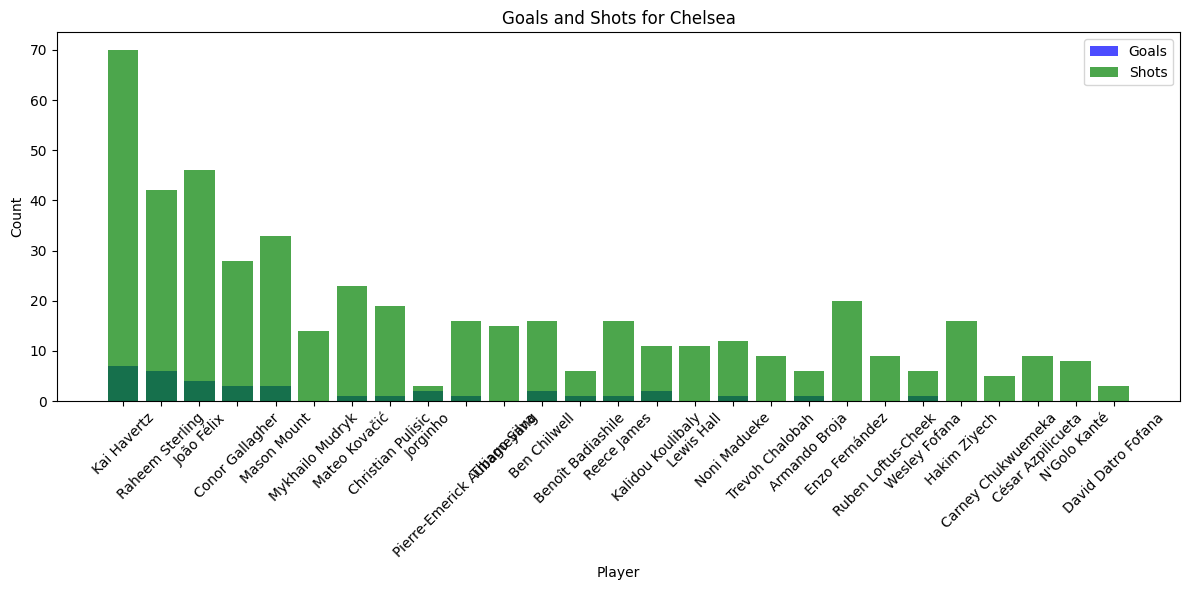

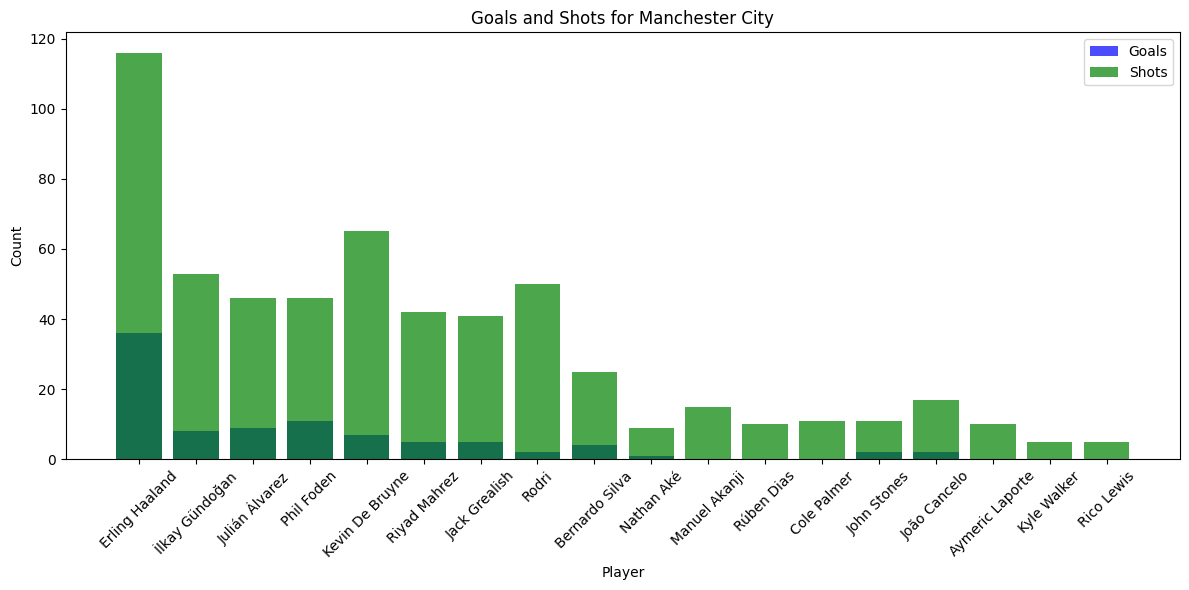

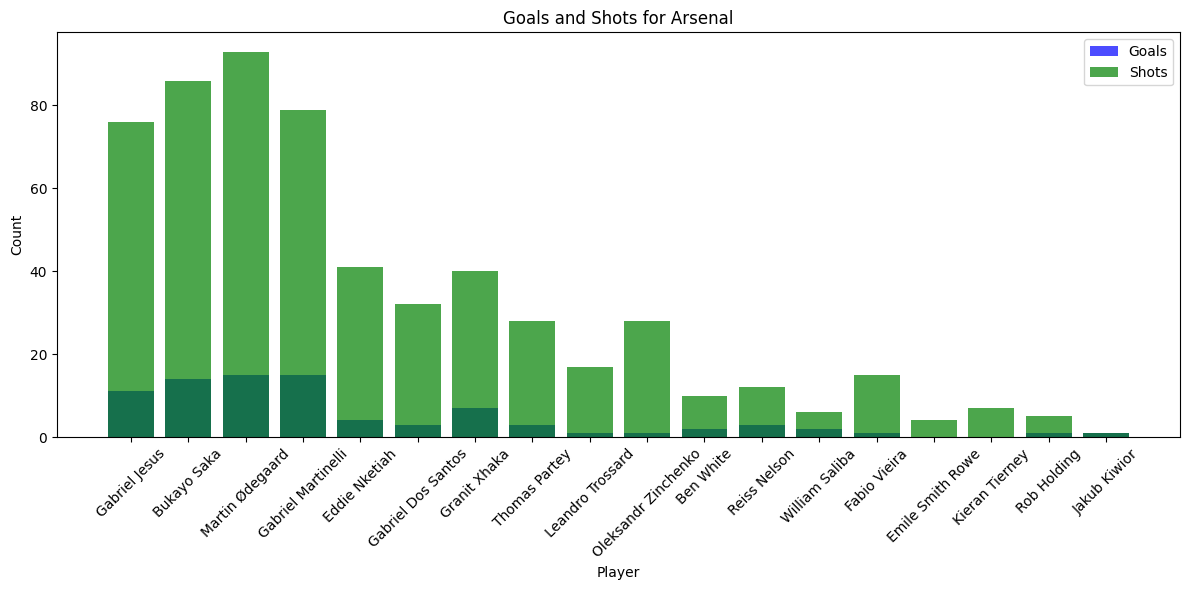

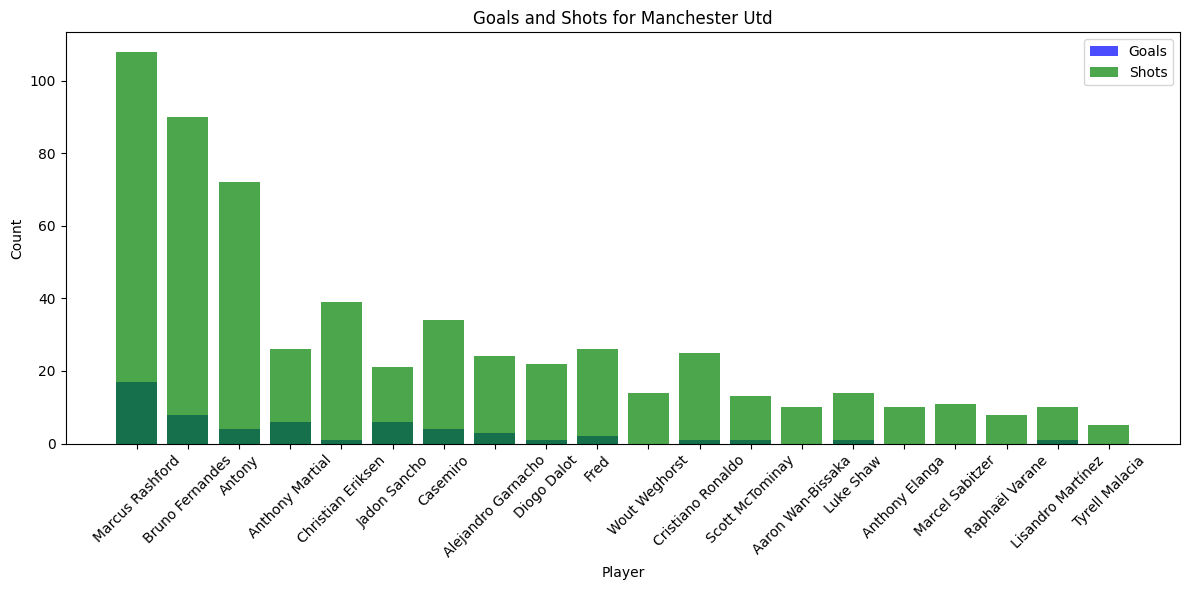

In [22]:
# Plot goals and shots for Chelsea FC
plot_goals_and_shots(chelsea_data, 'Chelsea')

# Plot goals and shots for the top 3 teams
plot_goals_and_shots(top_team1_data, top_team_names[0])
plot_goals_and_shots(top_team2_data, top_team_names[1])
plot_goals_and_shots(top_team3_data, top_team_names[2])

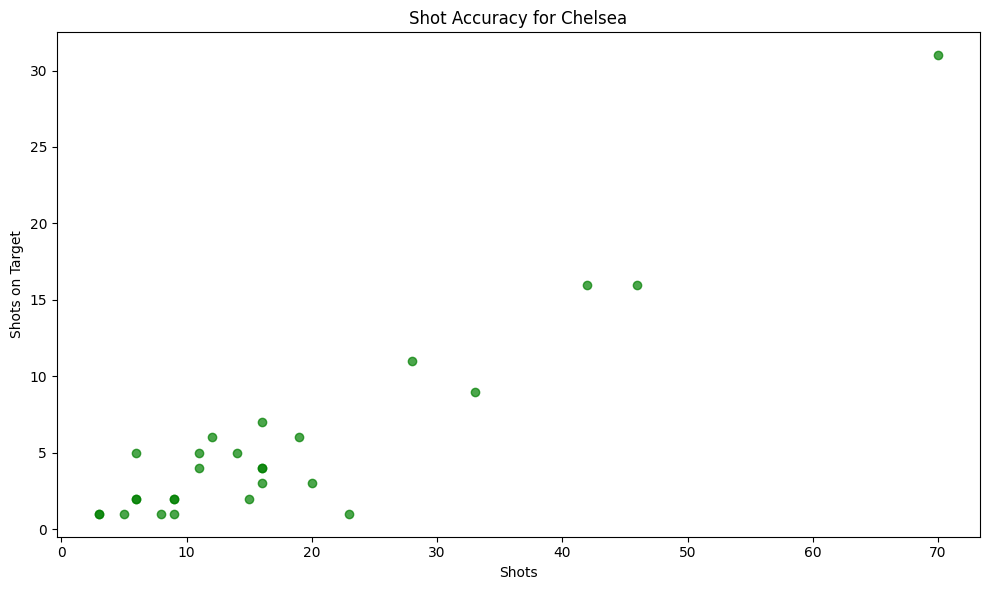

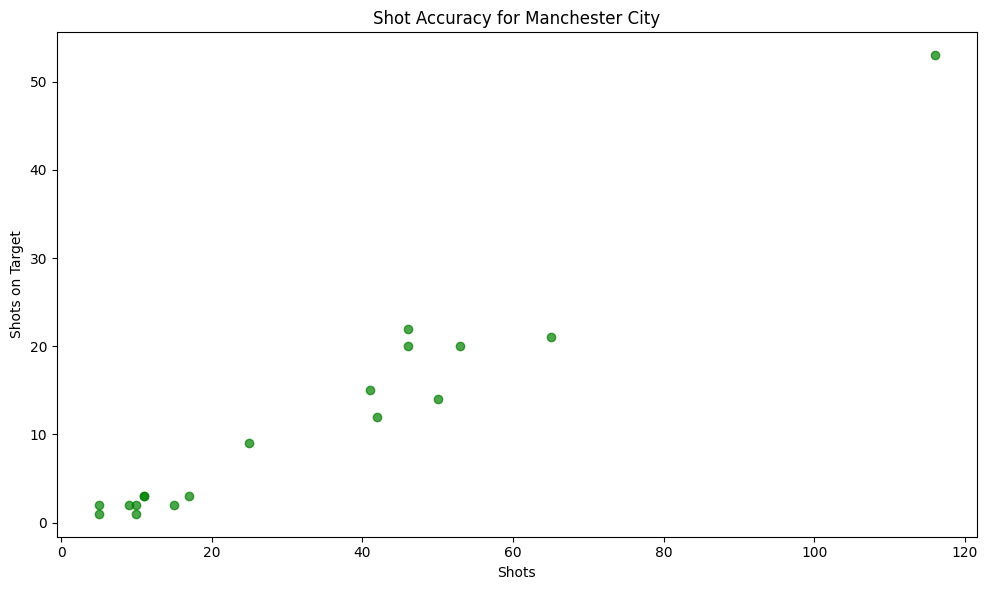

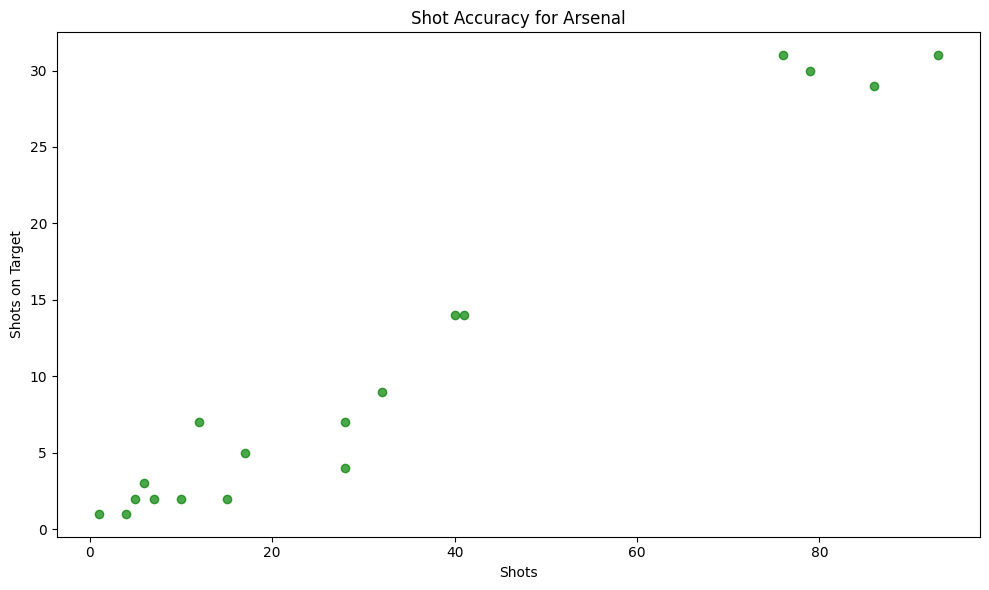

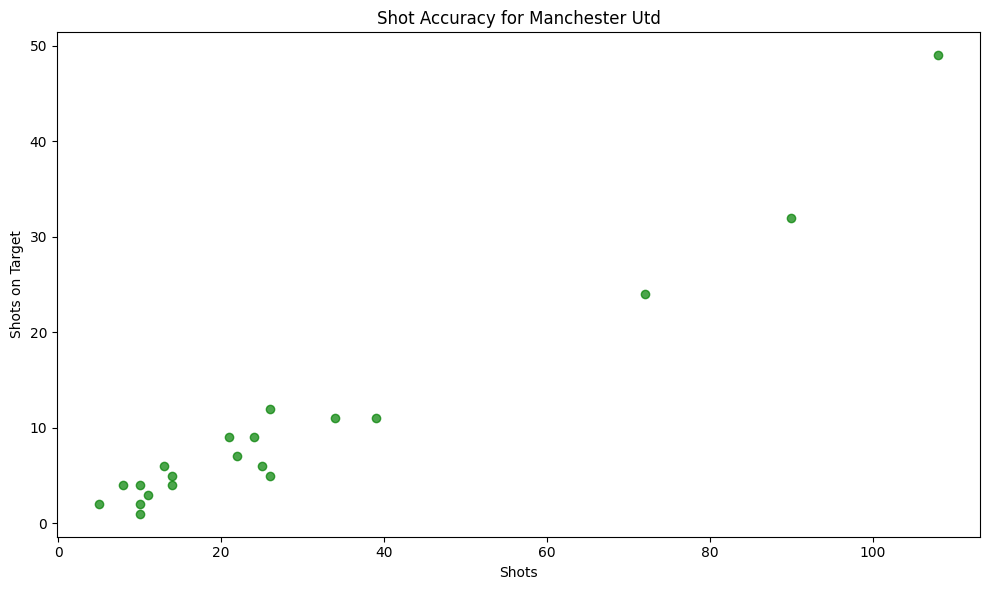

In [25]:
# Function to create a scatter plot for shot accuracy (shots vs. shots on target) for each player
def plot_shot_accuracy(data, team_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Sh'], data['SoT'], color='green', alpha=0.7)
    plt.xlabel('Shots')
    plt.ylabel('Shots on Target')
    plt.title(f'Shot Accuracy for {team_name}')
    plt.tight_layout()
    plt.show()

# Plot shot accuracy for Chelsea FC

plot_shot_accuracy(chelsea_data, 'Chelsea')

# Plot shot accuracy for the top 3 teams

plot_shot_accuracy(top_team1_data, top_team_names[0])

plot_shot_accuracy(top_team2_data, top_team_names[1])

plot_shot_accuracy(top_team3_data, top_team_names[2])

<Figure size 1000x600 with 0 Axes>

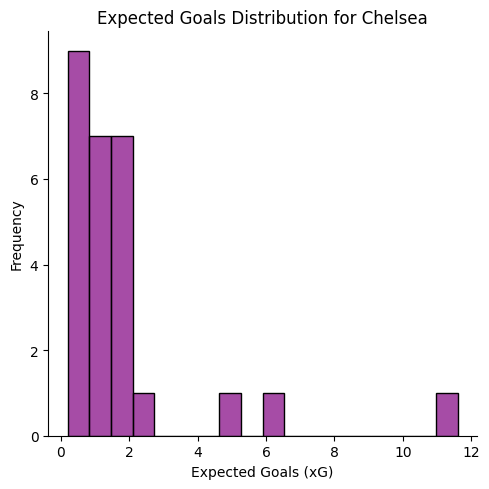

<Figure size 1000x600 with 0 Axes>

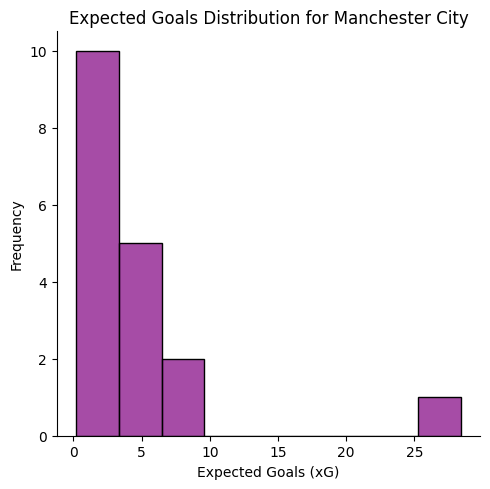

<Figure size 1000x600 with 0 Axes>

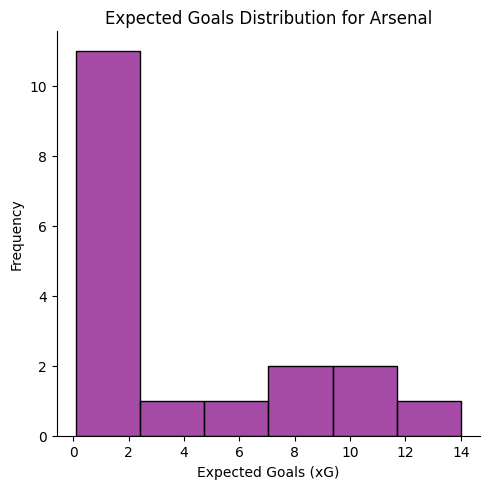

<Figure size 1000x600 with 0 Axes>

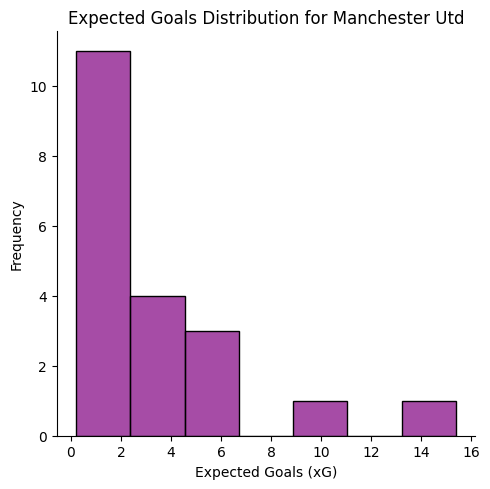

In [24]:
# Function to create a histogram for expected goals (xG) distribution
def plot_expected_goals(data, team_name):
    plt.figure(figsize=(10, 6))
    sns.displot(data['xG'],kind = 'hist', color='purple', alpha=0.7)
    plt.xlabel('Expected Goals (xG)')
    plt.ylabel('Frequency')
    plt.title(f'Expected Goals Distribution for {team_name}')
    plt.tight_layout()
    plt.show()

# Plot expected goals distribution for Chelsea FC
plot_expected_goals(chelsea_data, 'Chelsea')

# Plot expected goals distribution for the top 3 teams
plot_expected_goals(top_team1_data, top_team_names[0])
plot_expected_goals(top_team2_data, top_team_names[1])
plot_expected_goals(top_team3_data, top_team_names[2])
